In [1]:
#imported all basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#imported all required library
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier #classifier

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import classification_report

In [2]:
#to read csv file
df=pd.read_csv("fake_job_postings.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
#to check information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [4]:
#descripton of dataset
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#to check duplicate values
df.duplicated().sum()

0

In [6]:
#to drop duplicates values
df.drop_duplicates(inplace=True)

In [7]:
#to check null values
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [8]:
#to check no.of columns and rows
df.shape

(17880, 18)

In [9]:
#to check perecentage of null values
df.isna().sum()/df.shape[0]*100

job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.072707
benefits               40.324385
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

In [10]:
#to create variable of columns which are having null values more than 60%
missingvalues=df.columns[((df.isnull().sum()/len(df.index))*100)>60]
missingvalues

Index(['department', 'salary_range'], dtype='object')

In [11]:
#to delete columns having null values more than 60%
df.drop(missingvalues,axis=1,inplace=True)
df.drop("job_id",axis=1,inplace=True)

In [12]:
#to check null values of other column
df.isna().sum()/df.shape[0]*100

title                   0.000000
location                1.935123
company_profile        18.501119
description             0.005593
requirements           15.072707
benefits               40.324385
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

In [13]:
#to select i/p & o/p
x=df.iloc[:,:-1] #2D
y=df.iloc[:,-1] #1D 

In [14]:
#to separate column according to thier datatypes i.e. object, int64
x_cat=pd.DataFrame(x.select_dtypes(object).values)
x_num=pd.DataFrame(x.select_dtypes(['int64','float64']).values)

In [15]:
#filling all null values of object datatype with mode
x_cat = x_cat.fillna(x_cat.mode().iloc[0])
x_cat.isna().sum()/x_cat.shape[0]*10

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
dtype: float64

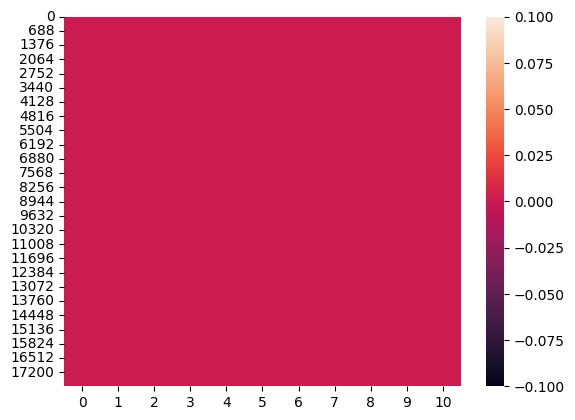

In [16]:
#to cross check null value with help of visualizaton
sns.heatmap(x_cat.isnull())
plt.show()

In [17]:
#applying one-hot encoding to categorical datatype(features) to convert data into numeric
x_cat = pd.DataFrame(pd.get_dummies(x_cat))
x_cat.head()

,0_ Electrician,0_ Environmental Technician I,0_ Piping Material Engineer,"0_ Discipline Manager Civil, Structural, Marine, Architectural",0_ FEA Senior engineer,0_ Manager of Project Management Organization - Engineering,0_ Mechanical Engineering Manager,"0_ Resources Change Management, Process Excellence and Change Enablement Manager",0_ ServiceNow Consultant,0_ AUTOCAD OPERATOR,...,10_Public Relations,10_Purchasing,10_Quality Assurance,10_Research,10_Sales,10_Science,10_Strategy/Planning,10_Supply Chain,10_Training,10_Writing/Editing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#to apply standard scaler on numeric data to convert all data in one unit of values
ss=StandardScaler()
x_num=pd.DataFrame(ss.fit_transform(x_num))
x_num.head()

,0,1,2
0,-0.211707,0.50733,-0.983580
1,-0.211707,0.50733,-0.983580
2,-0.211707,0.50733,-0.983580
3,-0.211707,0.50733,-0.983580
4,-0.211707,0.50733,1.016694


In [19]:
#concentinate categorical and numeric data together and form new dataframe
x=pd.concat([x_num,x_cat],axis=1)
x.head()

,0,1,2,0_ Electrician,0_ Environmental Technician I,0_ Piping Material Engineer,"0_ Discipline Manager Civil, Structural, Marine, Architectural",0_ FEA Senior engineer,0_ Manager of Project Management Organization - Engineering,0_ Mechanical Engineering Manager,...,10_Public Relations,10_Purchasing,10_Quality Assurance,10_Research,10_Sales,10_Science,10_Strategy/Planning,10_Supply Chain,10_Training,10_Writing/Editing
0,-0.211707,0.50733,-0.983580,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.211707,0.50733,-0.983580,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.211707,0.50733,-0.983580,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.211707,0.50733,-0.983580,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-0.211707,0.50733,1.016694,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
le=LabelEncoder()
y=pd.DataFrame(le.fit_transform(y))

In [21]:
#split train and test data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [22]:
x.count()

0                                  17880
1                                  17880
2                                  17880
0_   Electrician                   17880
0_   Environmental Technician I    17880
                                   ...  
10_Science                         17880
10_Strategy/Planning               17880
10_Supply Chain                    17880
10_Training                        17880
10_Writing/Editing                 17880
Length: 49215, dtype: int64

In [23]:
y.count()

0    17880
dtype: int64

In [ ]:
#created function to train data

ann=Sequential() #intialize model
ann.add(Dense(16,activation="relu")) #add i/p layer to model
ann.add(Dropout(rate=0.2))
ann.add(Dense(8,activation="relu")) #add hidden layer to model
ann.add(Dropout(rate=0.2))
ann.add(Dense(units=1,activation="sigmoid")) #add o/p layer to model
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"]) #complile model
#earlystop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25) #use early stopping
#ann.fit(xtrain,ytrain,epochs=300,validation_data=(xtest,ytest),callbacks=[earlystop]) #train data
ann.fit(xtrain,ytrain,epochs=30,batch_size=20) 

In [ ]:
#to generate report
ann=Sequential()
ypred=ann.predict(xtest)
print(classification_report(ytest,ypred))

In [ ]:
'''
from tensorflow.keras.models import load_model
ann.save("fakejobposting_model")
#storemodel=load_model("fakejobposting_model")
'''

In [ ]:
ylabel=np.argmax(ytest,axis=1)#actual
predlabel=np.argmax(ypred,axis=1)#predicted

In [ ]:
ac=np.sum(ylabel==predlabel)/length*100
print(f"Accuracy:{ac}")
